# EXPERIMENT 5

Sentiment analysis on amazon review dataset

In [3]:
import numpy as np
import pandas as pd 
import re

In [4]:
data=pd.read_csv("D:\downloads/1429_1.csv")

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data.head(10)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,NaN,NaN,tklit
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,NaN,NaN,Kacy
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",

In [6]:
df=data[['reviews.rating','reviews.text','reviews.title']]

In [7]:
df

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids
...,...,...,...
34655,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...
34656,1.0,Amazon should include this charger with the Ki...,Should be included
34657,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger
34658,1.0,I was surprised to find it did not come with a...,Not worth the money


In [8]:
print(df.isnull().sum())

reviews.rating    33
reviews.text       1
reviews.title      5
dtype: int64


In [9]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34621 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34621 non-null  float64
 1   reviews.text    34621 non-null  object 
 2   reviews.title   34621 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [11]:
import nltk

In [12]:
df["review.polarity"]=df['reviews.rating']>=4


<ipython-input-12-fe5a4356130e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review.polarity"]=df['reviews.rating']>=4


<AxesSubplot:>

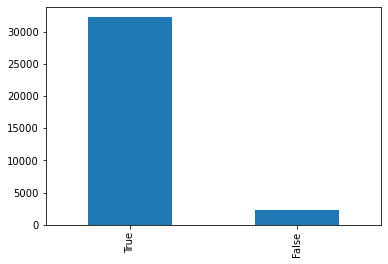

In [13]:
df["review.polarity"].value_counts().plot.bar()

In [14]:
cleanup_re = re.compile('[^a-z]+')
def text_lower(sent):
  sent=str(sent)
  sent=sent.lower()
  sent=cleanup_re.sub(' ',sent).strip()
  return sent

In [15]:
df["lower_text"]=df['reviews.text'].apply(text_lower)

<ipython-input-15-261257ea4304>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lower_text"]=df['reviews.text'].apply(text_lower)


In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [17]:
def lematization(sent):
  sent=sent.split()
  temp=""
  for i in sent:
    flag=lemmatizer.lemmatize(i)
    temp=temp+" "+flag
  return temp

In [18]:
df["lem_text"]=df['lower_text'].apply(lematization)

<ipython-input-18-029d90da7669>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lem_text"]=df['lower_text'].apply(lematization)


In [19]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

stop_words.remove('not')

In [20]:
def remove_stopwords(sent):
  word_tokens=sent.split()
  temp=""
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  for i in filtered_sentence:
    temp=temp+" "+i
  return temp

In [21]:
df["filtered_sent"]=df['lem_text'].apply(remove_stopwords)

<ipython-input-21-9b7535dcd0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_sent"]=df['lem_text'].apply(remove_stopwords)


In [22]:
df

,reviews.rating,reviews.text,reviews.title,review.polarity,lower_text,lem_text,filtered_sent
0,5.0,This product so far has not disappointed. My c...,Kindle,True,this product so far has not disappointed my ch...,this product so far ha not disappointed my ch...,product far ha not disappointed child love us...
1,5.0,great for beginner or experienced person. Boug...,very fast,True,great for beginner or experienced person bough...,great for beginner or experienced person boug...,great beginner experienced person bought gift...
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,True,inexpensive tablet for him to use and learn on...,inexpensive tablet for him to use and learn o...,inexpensive tablet use learn step nabi wa thr...
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,True,i ve had my fire hd two weeks now and i love i...,i ve had my fire hd two week now and i love i...,fire hd two week love tablet great value prim...
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,True,i bought this for my grand daughter when she c...,i bought this for my grand daughter when she ...,bought grand daughter come visit set user ent...
...,...,...,...,...,...,...,...
34655,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,False,this is not appreciably faster than any other ...,this is not appreciably faster than any other...,not appreciably faster higher amp charger use...
34656,1.0,Amazon should include this charger with the Ki...,Should be included,False,amazon should include this charger with the ki...,amazon should include this charger with the k...,amazon include charger kindle fact charging u...
34657,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,False,love my kindle fire but i am really disappoint...,love my kindle fire but i am really disappoin...,love kindle fire really disappointed kindle p...
34658,1.0,I was surprised to find it did not come with a...,Not worth the money,False,i was surprised to find it did not come with a...,i wa surprised to find it did not come with a...,wa surprised find not come type charging cord...


In [24]:
x=df["filtered_sent"]
y=df["review.polarity"]

In [39]:
data=df[["filtered_sent","review.polarity"]]

In [40]:
train=data[:28000]
test=data[28000:]

In [41]:
train["words"] = train["filtered_sent"].str.lower().str.split()
test["words"] = test["filtered_sent"].str.lower().str.split()


<ipython-input-41-c790f0f4954e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["words"] = train["filtered_sent"].str.lower().str.split()
<ipython-input-41-c790f0f4954e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["words"] = test["filtered_sent"].str.lower().str.split()


In [42]:
train

,filtered_sent,review.polarity,words
0,product far ha not disappointed child love us...,True,"[product, far, ha, not, disappointed, child, l..."
1,great beginner experienced person bought gift...,True,"[great, beginner, experienced, person, bought,..."
2,inexpensive tablet use learn step nabi wa thr...,True,"[inexpensive, tablet, use, learn, step, nabi, ..."
3,fire hd two week love tablet great value prim...,True,"[fire, hd, two, week, love, tablet, great, val..."
4,bought grand daughter come visit set user ent...,True,"[bought, grand, daughter, come, visit, set, us..."
...,...,...,...
28031,device useful entertaining interact internet ...,True,"[device, useful, entertaining, interact, inter..."
28032,find echo amazing speaker enabled saying alex...,True,"[find, echo, amazing, speaker, enabled, saying..."
28033,liked much got one dad step mom along smart p...,True,"[liked, much, got, one, dad, step, mom, along,..."
28034,actually gift bought sister big birthday rece...,True,"[actually, gift, bought, sister, big, birthday..."


In [30]:
X_train.iloc[0]

' purchased first echo love seems smarter ai system even wife enjoys alexa'

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
count_vect = CountVectorizer(min_df=2 ,stop_words=stop_words , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["filtered_sent"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["filtered_sent"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)


In [45]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["review.polarity"])
prediction= model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["review.polarity"])))

Multinomial Accuracy : 0.9472889291647787
